In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
import joblib

In [1]:
# Q1. What is the relationship between polynomial functions and kernel functions in machine learning
# algorithms?

Polynomial functions and kernel functions are both related to the representation and transformation of data in machine learning algorithms, particularly in the context of support vector machines (SVMs) and kernelized methods.

### Polynomial Functions:

1. **Basis Functions:**
   - Polynomial functions are a type of basis function used to transform input features into a higher-dimensional space.
   - In polynomial regression or SVMs with polynomial kernels, the input features are transformed using polynomial functions of different degrees.

2. **Representation:**
   - In polynomial regression, a polynomial function is used to represent the relationship between input features and the target variable.
   - In SVMs, the polynomial kernel is a type of kernel function that allows the algorithm to operate in a higher-dimensional space without explicitly computing the transformed feature vectors.

### Kernel Functions:

1. **Kernel Trick:**
   - Kernel functions play a crucial role in the "kernel trick," a technique used in machine learning algorithms like SVMs to implicitly map input data into a higher-dimensional space.
   - The kernel trick allows algorithms to work in higher-dimensional spaces without explicitly computing the transformed feature vectors, saving computational resources.

2. **Types of Kernels:**
   - Polynomial kernels are a specific type of kernel function. In addition to polynomial kernels, other common kernel functions include linear kernels, radial basis function (RBF) kernels, and more.
   - The choice of kernel function influences the model's ability to capture complex relationships in the data.

### Relationship:

1. **Polynomial Kernels as a Type of Kernel:**
   - Polynomial functions can be used as kernels in machine learning algorithms, such as the polynomial kernel in SVMs.
   - The polynomial kernel is defined as 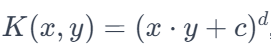, where \(d\) is the degree of the polynomial and \(c\) is a constant.

2. **Common Goal:**
   - Both polynomial functions and kernel functions aim to capture complex relationships in the data by transforming it into a higher-dimensional space.

3. **Flexibility:**
   - Kernel functions, including polynomial kernels, provide a flexible way to model non-linear relationships, allowing algorithms like SVMs to handle non-linear decision boundaries.

In summary, polynomial functions can be used as basis functions within kernelized machine learning algorithms, and polynomial kernels are a specific type of kernel function that employs polynomial transformations to implicitly operate in higher-dimensional spaces. Both approaches contribute to the flexibility of algorithms in capturing complex patterns in the data.

In [2]:

# Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
iris=datasets.load_iris()

In [6]:
X=iris.data

In [8]:
y=iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
svm_poly=SVC(kernel='poly',degree=3,C=1.0)

In [12]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [13]:
y_pred=svm_poly.predict(X_test)

In [14]:
accuracy_score(y_pred,y_test)

1.0

In [15]:
# Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

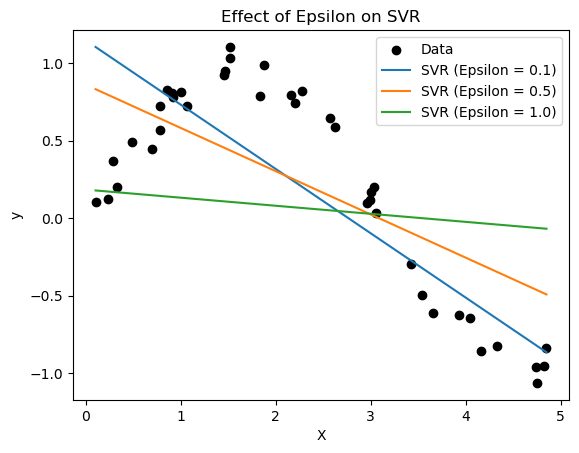

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Fit SVR models with different epsilon values
epsilons = [0.1, 0.5, 1.0]
svr_models = []

for epsilon in epsilons:
    svr = SVR(kernel='linear', epsilon=epsilon)
    svr.fit(X, y)
    svr_models.append(svr)

# Plot the data points
plt.scatter(X, y, color='black', label='Data')

# Plot SVR models with different epsilon values
for i, svr in enumerate(svr_models):
    label = f'SVR (Epsilon = {epsilons[i]})'
    plt.plot(X, svr.predict(X), label=label)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Effect of Epsilon on SVR')
plt.legend()
plt.show()


In Support Vector Regression (SVR), the parameter epsilon (often denoted as ε or epsilon-insensitive loss) is a crucial parameter that determines the width of the margin around the predicted values within which no penalty is incurred. It influences the trade-off between the accuracy of the fit and the smoothness of the regression function.

The epsilon-insensitive loss function is defined as follows:

- For data points within a distance of ε from the predicted value, there is no penalty.
- For data points outside this range, a penalty is incurred based on how far they are from the predicted value.

Now, let's discuss how increasing the value of epsilon affects the number of support vectors in SVR:

1. **Larger Epsilon (Wider Margin):**
   - Increasing the value of epsilon results in a wider margin around the predicted values.
   - A wider margin means that data points can be farther away from the predicted values without incurring a penalty.
   - Consequently, fewer data points are treated as support vectors because points within the wider margin are not considered support vectors.

2. **Smaller Epsilon (Narrower Margin):**
   - Conversely, decreasing the value of epsilon results in a narrower margin around the predicted values.
   - A narrower margin implies that data points need to be closer to the predicted values to avoid penalties.
   - This may lead to more data points being treated as support vectors because a smaller margin is less tolerant of deviations from the predicted values.

In summary, the choice of epsilon in SVR influences the width of the margin within which no penalty is incurred. A larger epsilon allows for a wider margin, reducing the number of support vectors, while a smaller epsilon results in a narrower margin, potentially increasing the number of support vectors. The appropriate choice of epsilon depends on the specific characteristics of the data and the desired trade-off between accuracy and smoothness in the regression function.

In [17]:
# Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
# affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
# and provide examples of when you might want to increase or decrease its value?

Support Vector Regression (SVR) involves several parameters that influence the performance and behavior of the model. Let's discuss the impact of the choice of kernel function, C parameter, epsilon parameter, and gamma parameter in SVR:

1. **Kernel Function:**
   - **Role:** Determines the type of kernel used for mapping data into a higher-dimensional space.
   - **Options:** Linear, Polynomial, Radial Basis Function (RBF/Gaussian), etc.
   - **Effect:** Different kernels capture different types of relationships in the data.
   - **Example:**
     - Use a linear kernel when the relationship between features and target is approximately linear.
     - Use an RBF kernel when the relationship is non-linear and may have complex patterns.

2. **C Parameter (Regularization):**
   - **Role:** Controls the trade-off between fitting the training data well and having a smooth decision boundary.
   - **Effect:** Larger C values lead to a more accurate fit to the training data but may result in overfitting.
   - **Example:**
     - Increase C when you want the model to fit the training data closely, especially if the data has noise.
     - Decrease C to encourage a smoother decision boundary when you want a more generalized model.

3. **Epsilon Parameter (Insensitive Loss):**
   - **Role:** Determines the width of the epsilon-insensitive tube around the predicted values.
   - **Effect:** Larger epsilon allows for a wider tube, making the model less sensitive to errors.
   - **Example:**
     - Increase epsilon when you want the model to be less sensitive to individual data point deviations.
     - Decrease epsilon when you want the model to be more sensitive and penalize deviations more.

4. **Gamma Parameter (RBF Kernel Specific):**
   - **Role:** Defines the influence of a single training example in the RBF kernel.
   - **Effect:** Smaller gamma values result in a broader influence, while larger values make the influence more localized.
   - **Example:**
     - Increase gamma for a more complex decision boundary when the data has intricate patterns.
     - Decrease gamma for a smoother decision boundary when the data has a more straightforward structure.

It's important to note that the impact of these parameters can vary depending on the specific characteristics of the dataset. Hyperparameter tuning, often performed through techniques like grid search or random search, helps identify the optimal combination of parameter values for a given problem.

Here's a general guideline:

- **Perform Grid Search:** Experiment with different values for each parameter using cross-validation to find the combination that results in the best performance.
- **Avoid Overfitting:** Be cautious about setting very high values for C and gamma, as it may lead to overfitting, especially if the dataset is small or noisy.
- **Consider Data Characteristics:** The choice of parameters depends on the characteristics of the data, and there is no one-size-fits-all solution.

Always validate the chosen parameters on a separate validation set or using cross-validation to ensure good generalization performance.

In [1]:
# Q5. Assignment:
# L Import the necessary libraries and load the dataseg
# L Split the dataset into training and testing setZ
# L Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
# L Create an instance of the SVC classifier and train it on the training datW
# L hse the trained classifier to predict the labels of the testing datW
# L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
# precision, recall, F1-scoreK
# L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
# improve its performanc_
# L Train the tuned classifier on the entire dataseg
# L Save the trained classifier to a file for future use.

In [3]:
iris=datasets.load_iris()

In [4]:
X=iris.data

In [5]:
y=iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
svc_Classifier=SVC()

In [9]:
svc_Classifier.fit(X_train_scaled,y_train)

SVC()

In [10]:
y_pred=svc_Classifier.predict(X_test_scaled)

In [11]:
accuracy_score(y_pred,y_test)

0.98

In [13]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [14]:
#Tunning of parameters

In [15]:
param={'C':[0.1,1,10,100],'kernel':['linear','poly','rbf'],'gamma':[0.1,0.01,0.001]}

In [16]:
grid_search=GridSearchCV(SVC(),param_grid=param,cv=5)

In [17]:
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']})

In [18]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [19]:
tunned_classifer=SVC(kernel='linear',gamma=0.1,C=0.1)

In [20]:
tunned_classifer.fit(X_train_scaled,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [21]:
ypred_2=tunned_classifer.predict(X_test_scaled)

In [22]:
accuracy_score(ypred_2,y_test)

0.98

In [24]:
joblib.dump(tunned_classifer,'tuned_svm_classifier.joblib')

['tuned_svm_classifier.joblib']